## Getting Started
### Import Libraries

In [3]:
import numpy as np
from skimage import color, data, filters, io, metrics, measure, morphology, restoration,util
from scipy import fft 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Image Segmentation Using Color Slicing
### Task 2: Load the Image

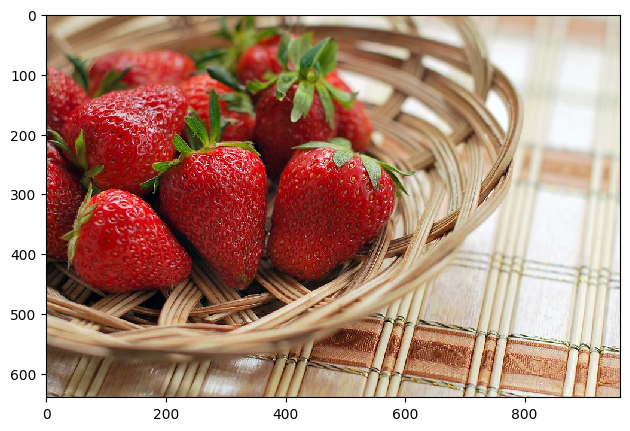

In [4]:
strawberry = util.img_as_float(io.imread("/usercode/strawberry.jpeg"))
io.imshow(strawberry)


### Task 3: Convert the Image to HSV

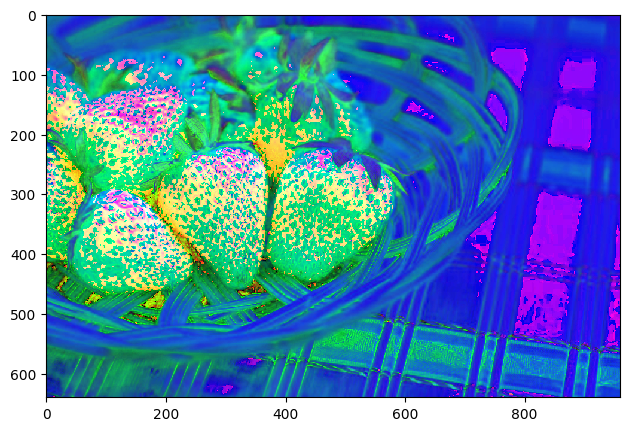

In [5]:
strawberry_hsv = color.rgb2hsv(strawberry)
io.imshow(strawberry_hsv)

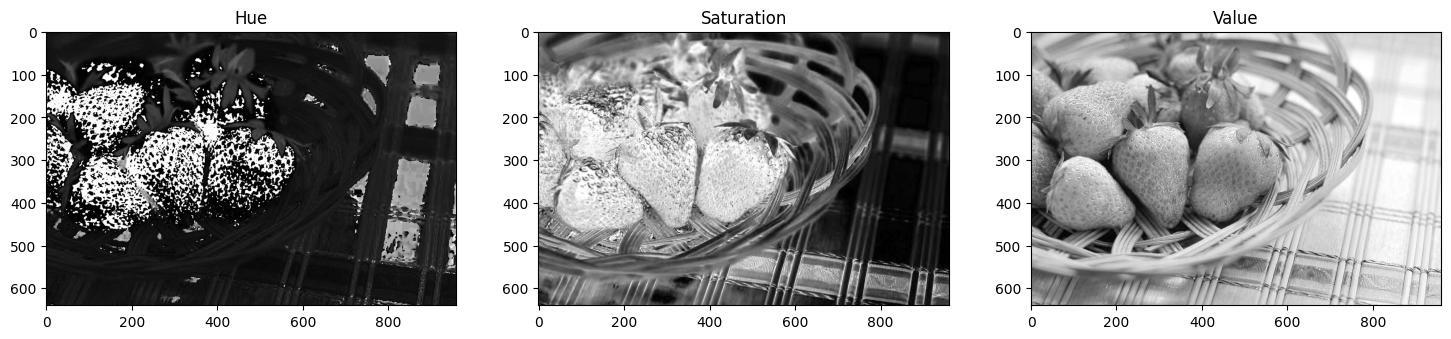

In [6]:
layer_title = ['Hue','Saturation','Value']
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,9))
for i in range(3):
    ax[i].imshow(strawberry_hsv[:,:,i],cmap = 'gray')
    ax[i].set_title(layer_title[i])


### Task 4: Perform Image Segmentation through Thresholding

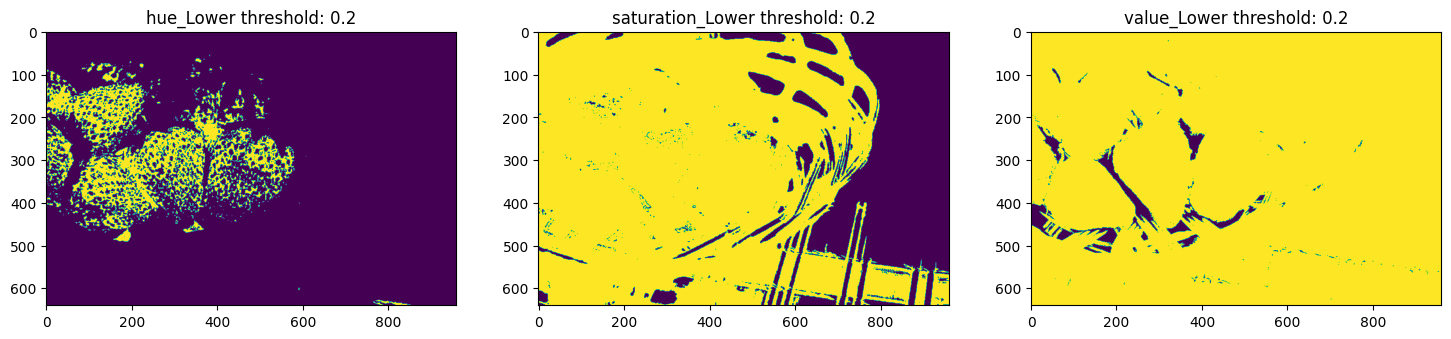

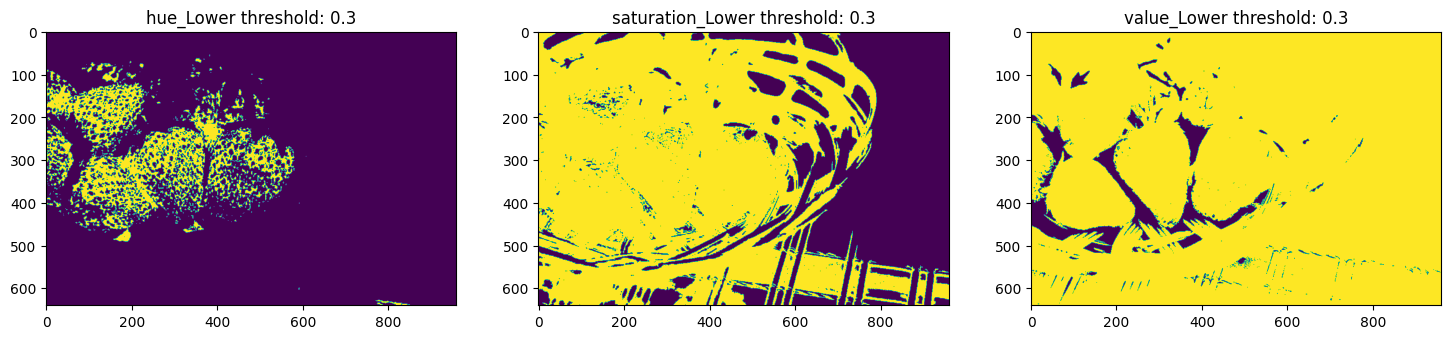

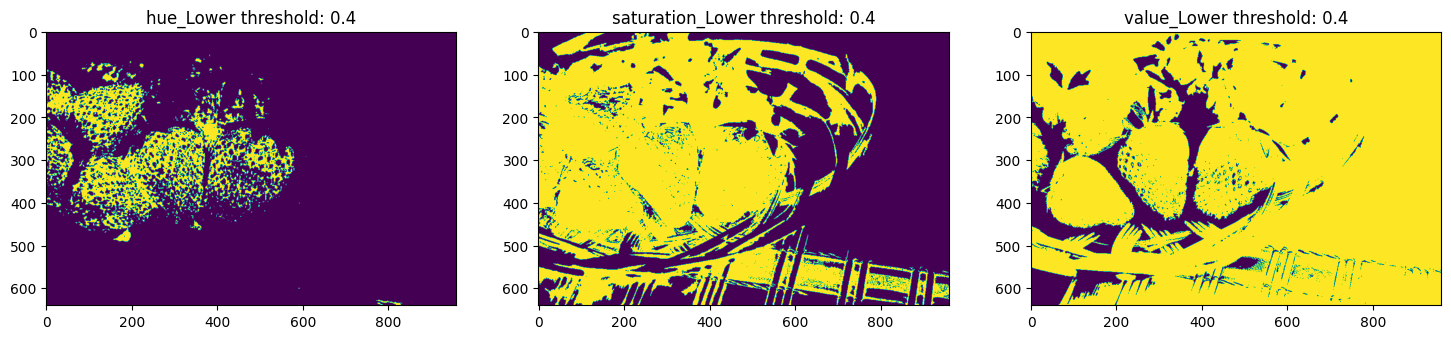

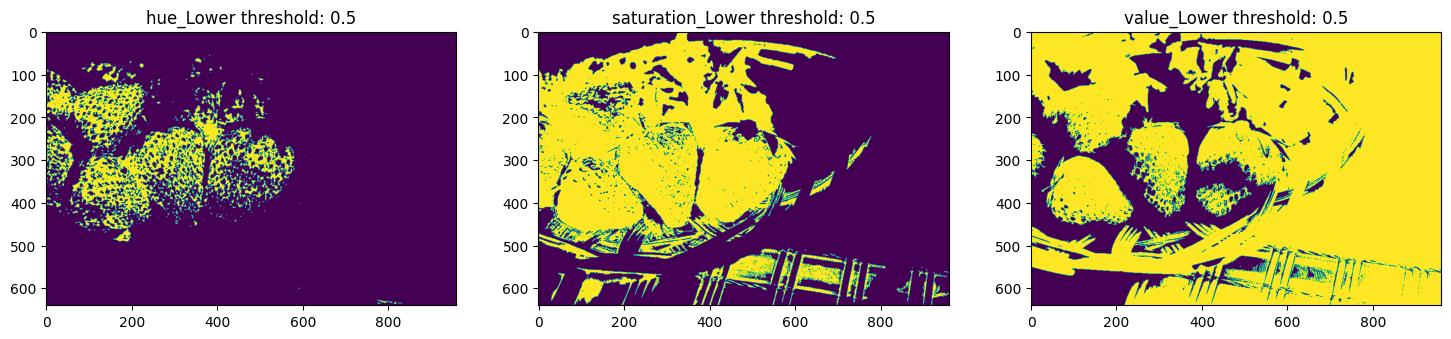

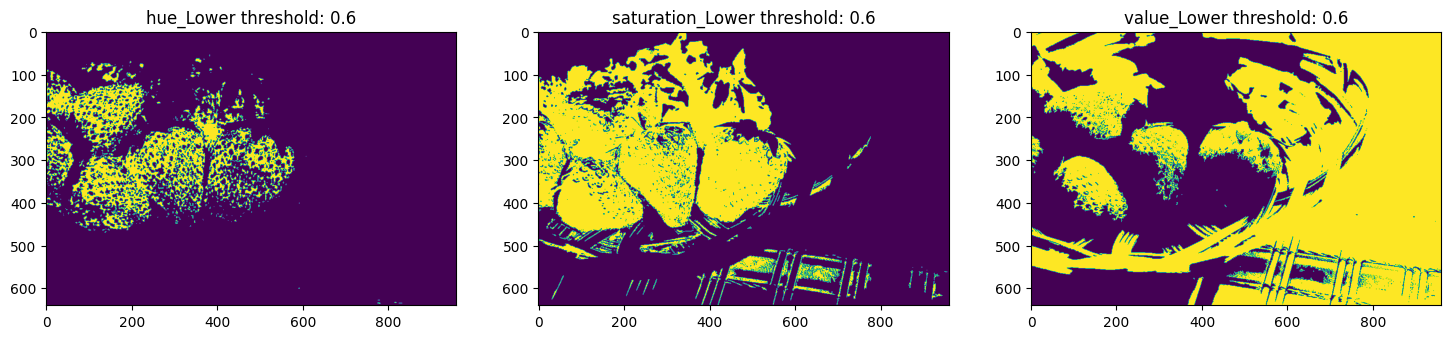

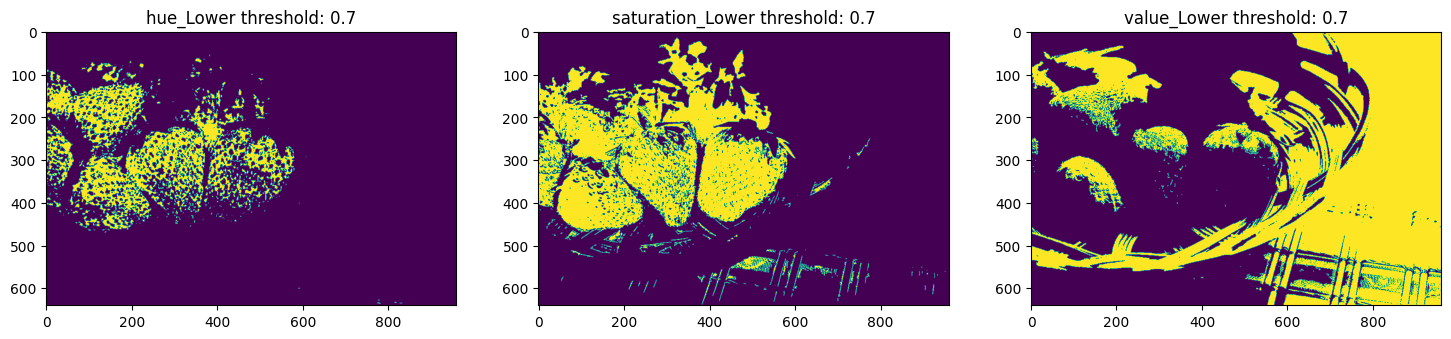

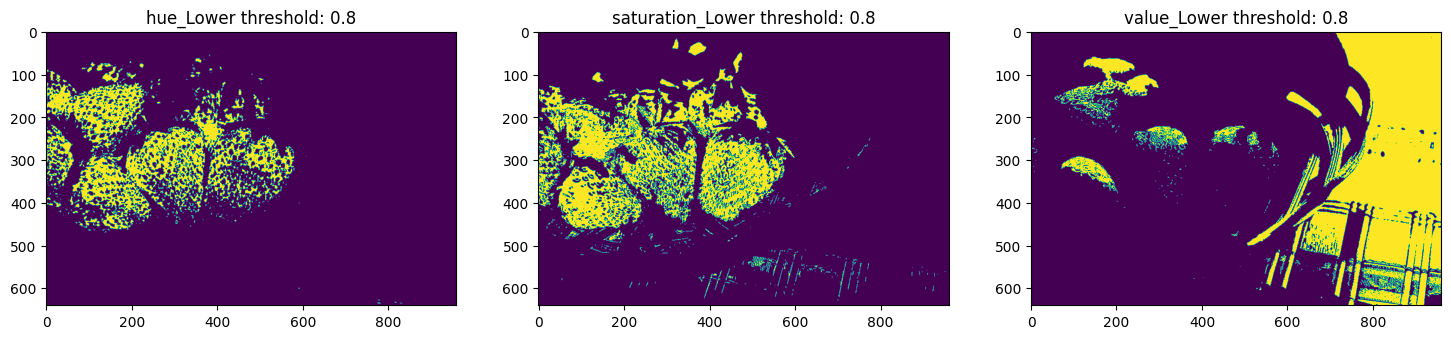

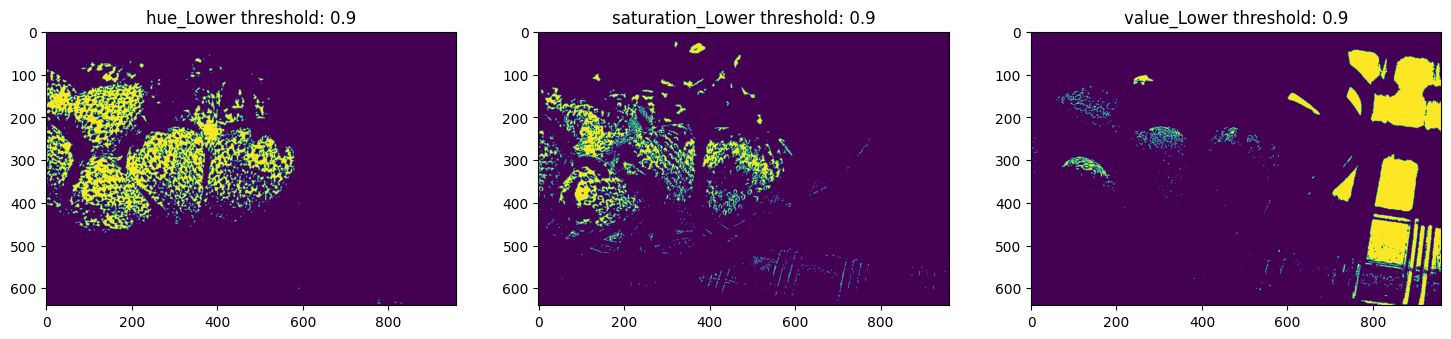

In [7]:
layer_title = ['hue','saturation','value']
lower = 0.2
higher = 0.99
strawberrythresh = []
while lower<higher:
    fig,ax = plt.subplots(nrows = 1,ncols = 3, figsize = (18,9))
    for i in range(3):
        strawberrythresh = filters.apply_hysteresis_threshold(strawberry_hsv[:,:,i],lower,higher)
        ax[i].imshow(strawberrythresh)
        ax[i].set_title(layer_title[i]+ "_Lower threshold: " +str(round(lower,1)))
    lower = lower+0.1
    



### Task 5: Improve the Segmentation Iteratively

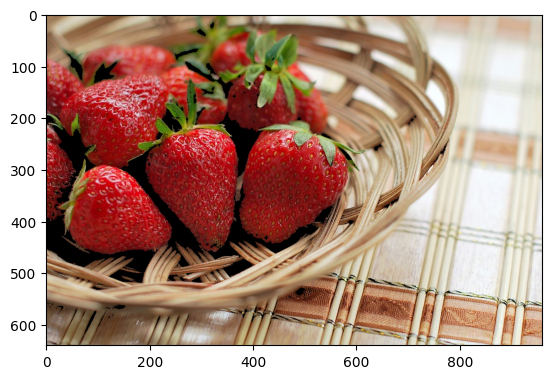

In [8]:
strawberrythresh = filters.apply_hysteresis_threshold(strawberry_hsv[:,:,2], 0.3,higher)
for i in range(3):
    strawberry_hsv[:,:,i] = strawberry_hsv[:,:,i]*strawberrythresh
#io.imshow(strawberry_hsv)
plt.imshow(color.hsv2rgb(strawberry_hsv))

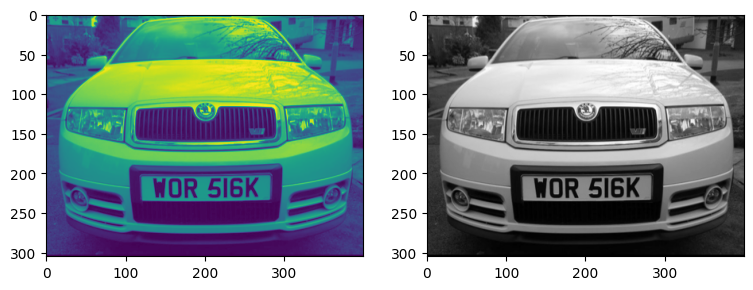

In [9]:
img_plate = io.imread("/usercode/car_plate.png")
copy = img_plate.copy()
copy = color.rgba2rgb(copy)
copy = color.rgb2gray(copy)
fig, ax  = plt.subplots(nrows  = 1, ncols = 2, figsize = (9,9))
ax[0].imshow(copy)
ax[1].imshow(copy,cmap = 'gray')

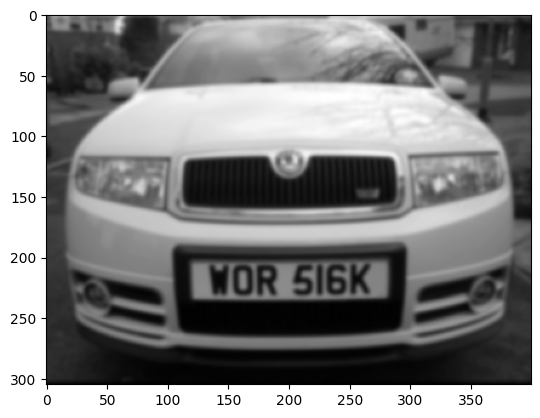

In [10]:
gaussianplate = filters.gaussian(copy,sigma = 1.5)
plt.imshow(gaussianplate, cmap = 'gray')

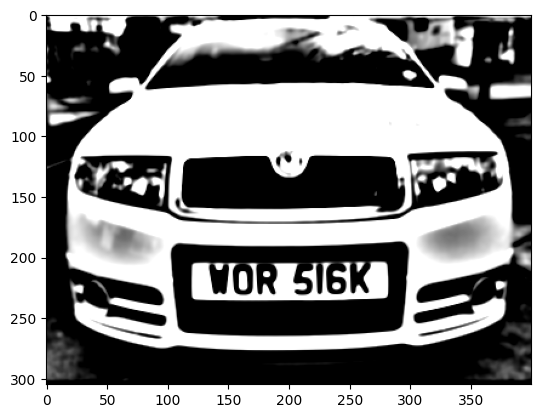

In [11]:
unsharp_plate = filters.unsharp_mask(gaussianplate, radius = 20, amount = 8)
plt.imshow(unsharp_plate,cmap = 'gray')

## Number Plate Detection Using Image Segmentation
### Task 6: Load the Image and Convert to Grayscale

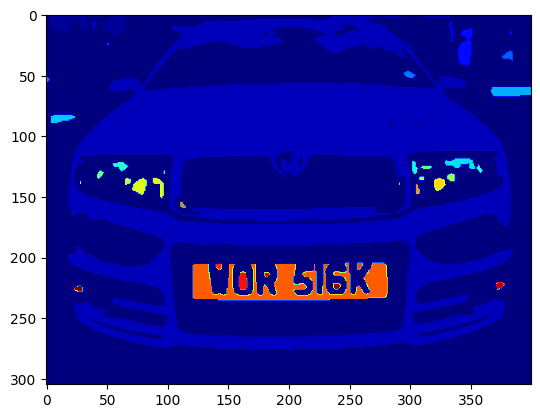

In [12]:
label_plates = measure.label(unsharp_plate)
plt.imshow(label_plates, cmap = 'jet')

### Task 7: Smooth the Image

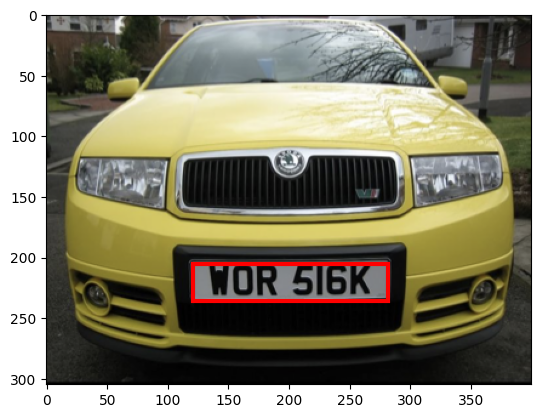

In [19]:
fig,ax  = plt.subplots(nrows = 1, ncols = 1)
ax.imshow(img_plate)
for region in measure.regionprops(label_plates):
    if region.area >= 500 and (region.area/region.area_bbox) >=0.4:
        min_row, min_col, max_row, max_col = region.bbox
        rect  = mpatches.Rectangle((min_col,min_row), max_col - min_col, max_row - min_row, fill = False, edgecolor  = 'red', linewidth = 3)
        ax.add_patch(rect)


### Task 8: Sharpen the Image

### Task 9: Label the Image Segments

### Task 10: Identify the Number Plate